**Cython** is a superset of python programming language that gives access into c/c++ constructs. 
- Cython acts as a bridge between Python and C/C++.

Load cython notebook extension (and i have already installed cython )

In [1]:
%load_ext cython

In [2]:
%%cython
'''Inside this cell is Cython Code only
'''

def first_cython_function(int i):
    return i * 3.1415926;


ld: warning: duplicate -rpath '/Users/wongdowling/opt/anaconda3/lib' ignored


In [3]:
# use cython function in a separate (python) cell
first_cython_function(10)

31.415926

In [4]:
%%cython?

In [5]:
def foo(a, b):
    return a + b

In [6]:
from dis import dis 
# disassebles compiled python objects
dis(foo)

  2           0 LOAD_FAST                0 (a)
              2 LOAD_FAST                1 (b)
              4 BINARY_ADD
              6 RETURN_VALUE


In [7]:
%%cython
def cyfoo(a, b):
    return a + b

ld: warning: duplicate -rpath '/Users/wongdowling/opt/anaconda3/lib' ignored


In [8]:
%timeit foo(1000000, 2000000)

60 ns ± 1.21 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [9]:
%timeit cyfoo(1000000, 2000000)

43 ns ± 0.0738 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [10]:
%timeit foo('x', 'y')

67.5 ns ± 0.176 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [11]:
%timeit cyfoo('x', 'y')

51.3 ns ± 0.145 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [12]:
def pyfac(n):
    if n <= 1:
        return 1
    return n * pyfac(n -1)

In [13]:
%timeit pyfac(20.0)

1.63 µs ± 5.24 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [14]:
%%cython

def cyfac(n):
    if n <= 1:
        return 1
    return n * cyfac(n-1)

def cyfac_double(double n):
    if n <= 1:
        return 1.0
    return n * cyfac_double(n-1)

/Users/wongdowling/.cache/ipython/cython/_cython_magic_e6f131a3b4f6bc900bbcff8ce7457cf5.c:2055:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
                    CYTHON_FALLTHROUGH;
                    ^
/Users/wongdowling/.cache/ipython/cython/_cython_magic_e6f131a3b4f6bc900bbcff8ce7457cf5.c:297:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
      #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
                                 ^
/Users/wongdowling/.cache/ipython/cython/_cython_magic_e6f131a3b4f6bc900bbcff8ce7457cf5.c:2066:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
                    CYTHON_FALLTHROUGH;
                    ^
/Users/wongdowling/.cache/ipython/cython/_cython_magic_e6f131a3b4f6bc900bbcff8ce7457cf5.c:297:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
      #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
                                 ^
2 warnings generated.
ld

In [15]:
%timeit cyfac(20.0)

770 ns ± 2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [16]:
%timeit cyfac_double(20.0)

440 ns ± 21.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [17]:
%%cython

cpdef double cyfac_double_fast(double n):
    if n <= 1:
        return 1.0
    return n * cyfac_double_fast(n - 1)

ld: warning: duplicate -rpath '/Users/wongdowling/opt/anaconda3/lib' ignored


In [18]:
%timeit cyfac_double_fast(20.0)

55.4 ns ± 0.122 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [19]:
### Loop based version
def pyfac_loop(n):
    r = 1.0
    for i in range(1, n+1):
        r *= i
    return r

In [20]:
%timeit pyfac_loop(20)

599 ns ± 2.08 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [21]:
%%cython
cpdef double cyfac_loop(int n):
    cdef double r = 1.0
    cdef int i
    for i in range(1, n+1):
        r *= <double>i
    return r
    

ld: warning: duplicate -rpath '/Users/wongdowling/opt/anaconda3/lib' ignored


In [22]:
%timeit cyfac_loop(20)

29.2 ns ± 0.0848 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Integral Types

In [23]:
%%cython

# cdef is an directive , telling objects are c objects
cdef:
    int i = 0
    unsigned long j = 1
    signed short k = -3
    bint flag = True
    long long ll = 1LL
    float a = 1.0
    double b = -2.0
    long double c= 1e5
    str s = "abc"
    
    
print(i, j, k, ll, flag, a, b, c, s)    

0 1 -3 1 True 1.0 -2.0 100000.0 abc


ld: warning: duplicate -rpath '/Users/wongdowling/opt/anaconda3/lib' ignored


In [24]:
%%cython 

import datetime
cimport cpython.datetime 

import array
cimport cpython.array

ld: warning: duplicate -rpath '/Users/wongdowling/opt/anaconda3/lib' ignored


### Example spin field

In [25]:
import numpy as np

In [26]:
def random_spin_field(N, M):
    return np.random.choice([-1, 1], size = (N, M))

In [27]:
field = random_spin_field(10, 10)
field

array([[-1,  1,  1, -1,  1, -1,  1, -1, -1, -1],
       [ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1],
       [ 1, -1,  1,  1, -1, -1,  1, -1, -1, -1],
       [ 1, -1, -1,  1,  1,  1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1,  1, -1, -1,  1,  1],
       [ 1, -1, -1, -1,  1,  1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1,  1, -1,  1, -1,  1],
       [ 1, -1,  1, -1, -1,  1,  1,  1, -1, -1],
       [-1, -1, -1,  1,  1,  1,  1,  1,  1, -1],
       [-1, -1,  1,  1,  1,  1, -1, -1, -1,  1]])

In [28]:
# pip install pillow
from PIL import Image

In [29]:
def display_spin_field(field):
    return Image.fromarray(np.uint8((field +1 )* 0.5 * 255)) # expects  nu. between 0 and 255

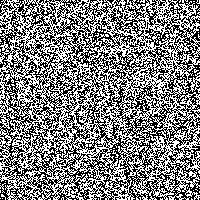

In [30]:
display_spin_field(random_spin_field(200,200))

In [31]:
def ising_step(field, beta=0.5):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
    return field


def _ising_update(field, n, m, beta):
    total = 0
    N, M  = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1
                

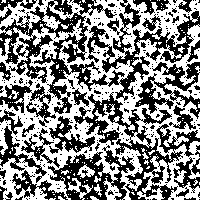

In [32]:
display_spin_field(ising_step(random_spin_field(200, 200)))

In [33]:
# Animate using ipywidgets

In [34]:
from ipywidgets import interact

In [35]:
def display_ising_sequence(images):
    def _show(frame=(0, len(images) -1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [36]:
images = [random_spin_field(200, 200)]
for i in range(50):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images)

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show(frame=(0, 50))>

In [37]:
%%cython
import numpy as np
cimport numpy as np # gives you access to Numpy C API
def cy_ising_step(field, beta=0.5):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update(field, n, m, beta)
    return field


def _cy_ising_update(field, n, m, beta):
    total = 0
    N, M  = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

In file included from /Users/wongdowling/.cache/ipython/cython/_cython_magic_e1e98574bbe4cf55cffee89452006118.c:710:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969:
/Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/wongdowling/.cache/ipython/cython/_cython_magic_e1e98574bbe4cf55cffee89452006118.c:4942:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
        

In [38]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

140 ms ± 844 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
122 ms ± 717 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
%%cython
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API

def cy_ising_step_fast(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_fast(field, n, m, beta)
    return field


cdef _cy_ising_update_fast(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1

In file included from /Users/wongdowling/.cache/ipython/cython/_cython_magic_83ced1afea287cd3f673e66ce071350a.c:711:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969:
/Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/wongdowling/.cache/ipython/cython/_cython_magic_83ced1afea287cd3f673e66ce071350a.c:20602:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
       

In [40]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

138 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
122 ms ± 478 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.9 ms ± 66.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%%cython 
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API

from libc.math cimport exp
from libc.stdlib cimport rand  
cdef extern from "limits.h":
    int RAND_MAX

def cy_ising_step_faster(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_faster(field, n, m, beta)
    return field


cdef _cy_ising_update_faster(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif exp(-dE * beta) > rand()/RAND_MAX:
        field[n, m] *= -1

In file included from /Users/wongdowling/.cache/ipython/cython/_cython_magic_51fc31038f47eff684371375d8c9ac09.c:712:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969:
/Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/wongdowling/.cache/ipython/cython/_cython_magic_51fc31038f47eff684371375d8c9ac09.c:3024:5: warning: code will never be executed [-Wunreachable-code]
    PyErr_SetString(PyExc_ZeroDivisi

In [42]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

%timeit cy_ising_step_faster(field)

138 ms ± 910 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
121 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.1 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.08 ms ± 3.15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [43]:
%%cython 
import numpy as np # gives access to python functions
cimport numpy as np # gives you access to Numpy C API
cimport cython

from libc.math cimport exp
from libc.stdlib cimport rand  
cdef extern from "limits.h":
    int RAND_MAX

@cython.boundscheck(False) # dont check index boundaries
@cython.wraparound(False) # can not use negative index
def cy_ising_step_fastest(long[:, :]field, float beta=0.5):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef  int n_offset, m_offset, n, m
   
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update_fastest(field, n, m, beta)
    return field


cdef _cy_ising_update_fastest(long[:,:]field, int n, int m, float beta):
    cdef int total = 0
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int i, j
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i%N, j%M]
    cdef float dE = 2 * field[n, m] * total
    if dE < 0:
        field[n, m] *= -1 # switch
    elif exp(-dE * beta) > rand()/RAND_MAX:
        field[n, m] *= -1

In file included from /Users/wongdowling/.cache/ipython/cython/_cython_magic_2e64a1b1cffb037baca679de5b38d366.c:713:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969:
/Users/wongdowling/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/wongdowling/.cache/ipython/cython/_cython_magic_2e64a1b1cffb037baca679de5b38d366.c:3029:5: warning: code will never be executed [-Wunreachable-code]
    PyErr_SetString(PyExc_ZeroDivisi

In [44]:
field = random_spin_field(200, 200)

%timeit ising_step(field)

%timeit cy_ising_step(field)

%timeit cy_ising_step_fast(field)

%timeit cy_ising_step_faster(field)

%timeit cy_ising_step_fastest(field)

139 ms ± 973 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
121 ms ± 830 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.7 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.07 ms ± 416 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.07 ms ± 6.94 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
